In [78]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import handytools.navigator as nav
from spectools.metrics.metrics import cubic_spline, curvature, angle, double_exp_wrap
from spectools.solvers import GNSolver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
shape_coor = nav.pklload("/src", "data", "stimulus", "shape_coor.pkl")

In [80]:
xbundle = []
for s in range(len(shape_coor)):
    anchors = np.array(shape_coor[s]).reshape(-1, 2)
    ps, dps, ddps = cubic_spline(anchors)

    ks, ts = [], []
    for i in range(len(ps)):
        k = curvature(dps[i], ddps[i])
        t = angle(ps[i])
        ks.append(k)
        ts.append(t)
    ks_ts = np.vstack((ks, ts)).T
    xbundle.append(ks_ts)

In [88]:
## TODO: this needs to be a readout value

R = np.arange(len(xbundle))

In [89]:
gns = GNSolver(fit_function = double_exp_wrap)
gns.fit(xbundle, R, init_guess=[-0.75, 0.5, np.pi, np.pi/2, 1])

array([ 3.26752486e+02,  4.63323582e+02, -7.85713381e+04, -4.13194470e+05,
        2.90853263e+01])

In [90]:
R_pred = gns.predict(xbundle)

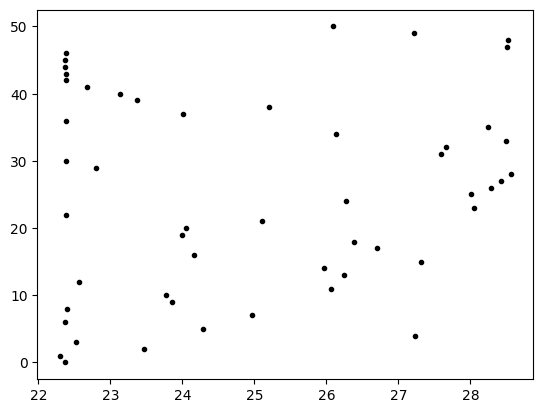

In [91]:
plt.plot(R_pred, R, "k.")